# Notes and examples on xarray

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays.

The core data structure introduced in the xarray package are:
- **DataArray**: a labeled N-dim array
- **Dataset**: multi-dim, in memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

Create a **DataArray**

In [4]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[-2.50654532,  0.84605981, -0.1363487 ],
       [ 0.97811196,  0.63014989,  0.02106915]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

Two coordinate labels ‘10’ and ‘20’ have been associated with the two locations along the x dimension.

In [5]:
data.values

array([[-2.50654532,  0.84605981, -0.1363487 ],
       [ 0.97811196,  0.63014989,  0.02106915]])

In [6]:
data.dims

('x', 'y')

In [9]:
data.attrs

{}

We can access data, having labels, with different methods.

For example if we want to access the data with x=10:

In [13]:
data[0,:] # positional and by integer label, like numpy

<xarray.DataArray (y: 3)>
array([-2.50654532,  0.84605981, -0.1363487 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [14]:
data.loc[10] # loc: positional and coordinate label, like pandas

<xarray.DataArray (y: 3)>
array([-2.50654532,  0.84605981, -0.1363487 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [15]:
data.isel(x=0) # isel or "integer select":  by dimension name and integer label

<xarray.DataArray (y: 3)>
array([-2.50654532,  0.84605981, -0.1363487 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [16]:
data.sel(x=10) # sel or "select": by dimension name and coordinate label

<xarray.DataArray (y: 3)>
array([-2.50654532,  0.84605981, -0.1363487 ])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

## Attributes

Metadata can be set, or can be already present in the dataset we're analyzing. The structure is a dictionary so can be customized.

In [17]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"]     = "m/s"

data.attrs

{'long_name': 'random velocity', 'units': 'm/s'}

## Computation 

Most of the operations can be done like with numpy ndarrays. Some operations may take advantage of dimension names instead of axis numbers.

In [18]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([-0.76421668,  0.73810485, -0.05763977])
Dimensions without coordinates: y

## Plot

It is possible to automatically plot a dataset with matplotlib and the metadata will be used to automatically label axis, colorbar and units.

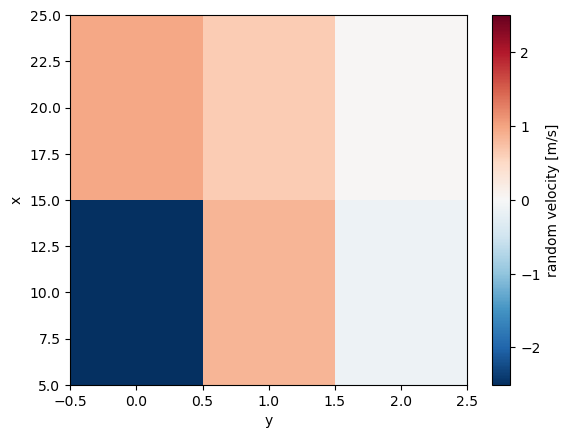

In [19]:
data.plot()